In [1]:
import numpy as np
import data_cleanup as dc
import data_exploration as de
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

aa = pd.read_csv('../DMS_data/aminoacids.csv')

gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')
norm_frame = dc.aufteilung_mut_pos(dc.norm(gia_null_eto))

In [2]:
dist_chem = de.aa_distance_matrix(aa)
dist_p53 = de.dms_distance_matrix(norm_frame)


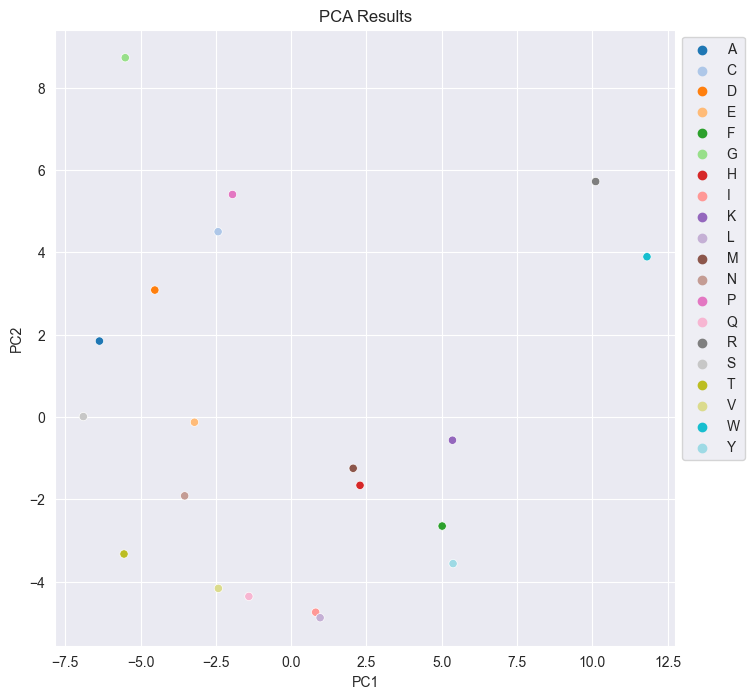

In [3]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dist_chem.values)

# Create a color map for the letters
letters = dist_chem.columns
colors = sns.color_palette('tab20', len(letters))

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Letter'] = letters

# Plot the PCA results
plt.figure(figsize=(8, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Letter', palette=colors).set(title="PCA Results")

# Show the plot
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def determine_optimal_clusters(data, max_clusters):
    silhouette_scores = []  # List to store the silhouette scores for different cluster numbers

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plotting the Silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score')
    plt.title('Silhouette Method: Determining Optimal Number of Clusters')
    plt.show()

    # Find the optimal number of clusters using the maximum Silhouette score
    optimal_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 to account for zero-based indexing

    return optimal_clusters


# Example usage
data =
optimal_clusters = determine_optimal_clusters(data, max_clusters=10)
print('Optimal number of clusters:', optimal_clusters)

SyntaxError: invalid syntax (82370129.py, line 33)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(dist_chem.values)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dist_chem.values)

# Create a DataFrame for visualization
df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df['Cluster'] = clusters

# Define the cluster colors
cluster_colors = sns.color_palette('Set1', n_colors=len(np.unique(clusters)))

# Plot the PCA results with color-coded clusters
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette=cluster_colors).set(
    title="PCA with K-means Clustering")

# Create a legend with cluster labels
legend_labels = ['Cluster {}'.format(i) for i in np.unique(clusters)]
plt.legend(title='Clusters', labels=legend_labels, bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
########################################